### 1. Importing Required Modules & Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import sklearn.cluster as cluster
import scipy.optimize as opt
import matplotlib.gridspec as gridspec 

### 2. Defining Functions

In [4]:
#Functions used for this projects mentioned below

def World_Bank_Reader(wb_file_name):
    """This is the docstring of the function World_Bank_Reader to read the data from the world bank csv
    file downloaded from the world bank site """
    
    #Reading data from the world bank csv file downloaded from the world bank website
    climate_change_df = pd.read_csv(wb_file_name, skiprows=4) 
    
    climate_change_df.drop(climate_change_df.columns[[-1]], axis=1, inplace=True)
    
    #Deriving data with Years as columns
    climate_year_df = climate_change_df[:]  
    
    #Deriving dataframe with country name as columns
    climate_country_df = climate_change_df.groupby(['Country Name']).aggregate('first').transpose()
    
    return climate_country_df, climate_year_df

### PART 1- Functions Normalization & Clustering

def norm_fun(data):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    minimum_val = np.min(data)
    maximum_val = np.max(data)
    
    norm_data = (data-minimum_val)/(maximum_val-minimum_val)
    
    return norm_data


def normalize_df(norm_data):
    
    """ Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine"""
    
    # iterate over all columns
    for cc_column in norm_data.columns[1:]:     # excluding the first column
        norm_data[cc_column] = norm_fun(norm_data[cc_column])
        
    return norm_data


def square_plot(data, xaxis, yaxis):
    
    """Produces a square plot of two columns of dataframe df using small circle 
    symbols."""
    
    plt.plot(data[xaxis], data[yaxis], "o", markersize=6)
    
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    

def heat_map(data):
    
    """Heat Map function for plotting the correlation data using the Correlation data recieved from the .Corr() function"""
    
    # Setting up the style
    plt.style.use('dark_background')
    
    # Using heatmap function from the SNS library for ploting heat map
    sns.heatmap(data, annot=True, cmap="YlGnBu")
    
    plt.show()
    

    
def K_mean (data, xaxis, yaxis, n, title):
    
    #kmeans set up the clusterer, n expected clusters
    kmeans = cluster.KMeans(n_clusters=n)

    #extract columns for fitting
    data_fit = data[[xaxis, yaxis]].copy()
    kmeans.fit(data_fit)     

    # extract labels and cluster centres
    cluster_labels = kmeans.labels_
    cluster_center = kmeans.cluster_centers_

    # plot using the labels to select colour
    col = ["blue", "red", "green", "magenta", "yellow", "orange"]
    
    # loop over the different labels
    for l in range(n):     
        plt.plot(data_fit[xaxis][cluster_labels==l], data_fit[yaxis][cluster_labels==l],
                 "o", markersize=8, color=col[l])
    
    # show cluster centres
    for iter_cent in range(n):
        xcluster, ycluster = cluster_center[iter_cent,:]
        plt.plot(xcluster, ycluster, "dk", markersize=12, color='white')
    
    plt.title (title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    
  


### 3. Defining Global Variables and Parameters

In [8]:
#Defining Global Variables & List used for the use of data manipulation

Forest_Area = "AG.LND.FRST.K2"
CO2 = "EN.ATM.CO2E.PC"
Population = "SP.POP.TOTL"

Energy_use = "EG.USE.PCAP.KG.OE"
Arable_Land = "AG.LND.ARBL.ZS"
Renewable_Euse = "EG.FEC.RNEW.ZS"

#Indicator_replace list used to replace the Indicator code with an understandig words
Indicator_replace = {"EN.ATM.CO2E.PC":"CO2","AG.LND.FRST.K2":"Forest_Area","SP.POP.TOTL":"Population",
                  "EG.USE.PCAP.KG.OE":"Energy_use","AG.LND.ARBL.ZS":"Arable_Land","EG.FEC.RNEW.ZS":"Renewable_Euse"}

#Indicator_map used for maping the data-frame with corresponding indicators used by World bank data
Indicator_map = ["EN.ATM.CO2E.PC","AG.LND.FRST.K2","SP.POP.TOTL","EG.USE.PCAP.KG.OE","AG.LND.ARBL.ZS","EG.FEC.RNEW.ZS"]

### 4. Reading Data Frames using Funtion From the World Bank Data File

In [9]:
#Assigning World Bank Data file name to a variable
wb_file_name = 'World_Bank_Data_File.csv'

In [10]:
#Using World Bank Reader function defined in the function section to generate 2x data frame as per the assignment requirement
country_df, year_df = World_Bank_Reader(wb_file_name)

###### 4.1 Returning Dataframe with Transposed format ( Countries as columns )

In [11]:
country_df.head()

Country Name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,AFE,AFW,ALB,DZA,ASM,AND,AGO,ATG,ARB,...,UZB,VUT,VEN,VNM,VIR,PSE,WLD,YEM,ZMB,ZWE
Indicator Name,Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),...,Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population)
Indicator Code,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,...,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS
1960,8.401,14.704688,14.670329,30.705,30.51,66.211,58.45,10.435,39.656,31.234142,...,33.978,10.404,61.613,14.7,56.477,44.044,33.617972,9.1,18.145,12.608
1961,8.684,14.944459,15.053577,30.943,31.797,66.641,60.983,10.798,39.04,31.979927,...,34.238,10.583,62.875,15.031,57.864,44.734,34.11549,9.459,18.951,12.821


###### 4.2 Returning Dataframe with Original Format (Years as columns)

In [12]:
year_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,43820.000000,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.100461,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102050.000000,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.377979,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017


### 5. Re-arranging Data frame for the Analysis

#### 5.1 Arranging Data Frame

In [13]:
# Filtering out the required indicators for the anlysis from the previously defined Indicator Map list
year_df_new = year_df[year_df['Indicator Code'].isin(Indicator_map)]

In [14]:
# Replacing Not Identifiable Indicator code in to a known Identifiers
year_df_new["Indicator Code"].replace(Indicator_replace, inplace=True)

year_df_new = year_df_new.copy(deep=True) #To avoid warning related to the 'caveat'

In [15]:
# Droping Country Name  & Indicator Name as it is already defined
year_df_new = year_df_new.drop(['Country Code', 'Indicator Name'], axis=1, inplace=False)

In [16]:
country_data = year_df_new.reset_index()

In [17]:
#Normalizing the index for the easy analysis
country_data.drop(['index'], axis=1, inplace=True)

In [18]:
stat_data = country_data.groupby(['Country Name', 'Indicator Code']).aggregate('mean')

In [19]:
df_env_f = stat_data.stack().unstack(level=1)

stat_data2 = df_env_f.groupby(['Country Name']).aggregate('mean')

In [20]:
stat_data_orig = stat_data2.reset_index()

#### 5.2 Handling Null Values

In [21]:
# Handling the null values
stat_data_orig['CO2'].fillna(stat_data_orig['CO2'].mean(), inplace=True)
stat_data_orig['Forest_Area'].fillna(stat_data_orig['Forest_Area'].mean(), inplace=True)
stat_data_orig['Arable_Land'].fillna(stat_data_orig['Arable_Land'].mean(), inplace=True)
stat_data_orig['Energy_use'].fillna(stat_data_orig['Energy_use'].mean(), inplace=True)
stat_data_orig['Renewable_Euse'].fillna(stat_data_orig['Renewable_Euse'].mean(), inplace=True)

In [22]:
stat_data_orig.isnull().any()

Indicator Code
Country Name      False
Arable_Land       False
CO2               False
Energy_use        False
Forest_Area       False
Population        False
Renewable_Euse    False
dtype: bool

### 6. Normalization

###### 6.1 Checking the Statistics Parmeters on the Original Data

In [23]:
print(stat_data_orig.describe())

Indicator Code  Arable_Land         CO2    Energy_use   Forest_Area  \
count            265.000000  265.000000    265.000000  2.650000e+02   
mean              13.443366    4.177559   1895.796921  1.649439e+06   
std               12.515379    5.386262   2156.914839  4.973255e+06   
min                0.001857    0.032085     12.400284  0.000000e+00   
25%                4.409092    0.681027    583.991525  3.586919e+03   
50%               10.109718    2.382121   1417.530562  3.845968e+04   
75%               17.753573    5.857436   2094.327008  3.178232e+05   
max               65.944942   45.658401  18278.542119  4.050289e+07   

Indicator Code    Population  Renewable_Euse  
count           2.650000e+02      265.000000  
mean            2.110150e+08       31.060149  
std             6.672000e+08       29.144524  
min             8.398623e+03        0.000000  
25%             1.080250e+06        5.892649  
50%             7.172309e+06       21.950652  
75%             4.796420e+07   

###### 6.2 Finding the Correlation between Indicators on Original Data

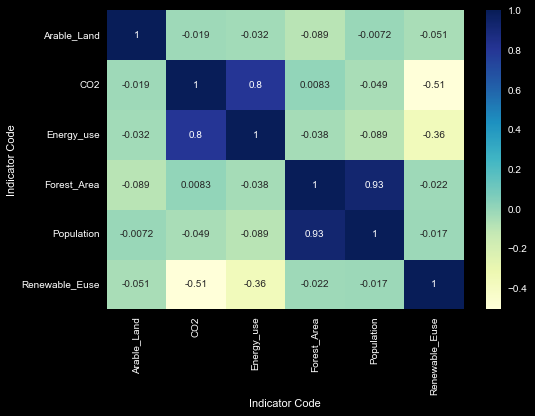

In [24]:
data_corr = stat_data_orig.corr()  
heat_map(data_corr)

###### 6.3 Normalizing the Data & Displaying the Correlation

In [25]:
# Normalizing the data for the good fitting & displaying the statistical parameters of the data frame

stat_data_orig = normalize_df(stat_data_orig)

print(stat_data_orig.describe())

Indicator Code  Arable_Land         CO2  Energy_use  Forest_Area  Population  \
count            265.000000  265.000000  265.000000   265.000000  265.000000   
mean               0.203835    0.090857    0.103109     0.040724    0.039800   
std                0.189791    0.118052    0.118083     0.122788    0.125846   
min                0.000000    0.000000    0.000000     0.000000    0.000000   
25%                0.066834    0.014223    0.031292     0.000089    0.000202   
50%                0.153282    0.051506    0.076925     0.000950    0.001351   
75%                0.269198    0.127675    0.113977     0.007847    0.009045   
max                1.000000    1.000000    1.000000     1.000000    1.000000   

Indicator Code  Renewable_Euse  
count               265.000000  
mean                  0.321915  
std                   0.302061  
min                   0.000000  
25%                   0.061073  
50%                   0.227502  
75%                   0.535535  
max            

### 7. Pre-Processing - Plot a few combinations of attributes (using a function on GridSpec() )

We are looking into the possibility of different combinations of Indicators to make interesting clusters by using the Scatter Plot. From the below plots we understand that below parameters are good for making analyzable clusters 

#### 1. CO2 vs Population 
#### 2. Forest Area vs Population 
#### 3. CO2 vs Forest Area
#### 4. Renewable Energy vs Population
#### 5. Energy Use vs Population 
#### 6. Renewable Energy vs CO2

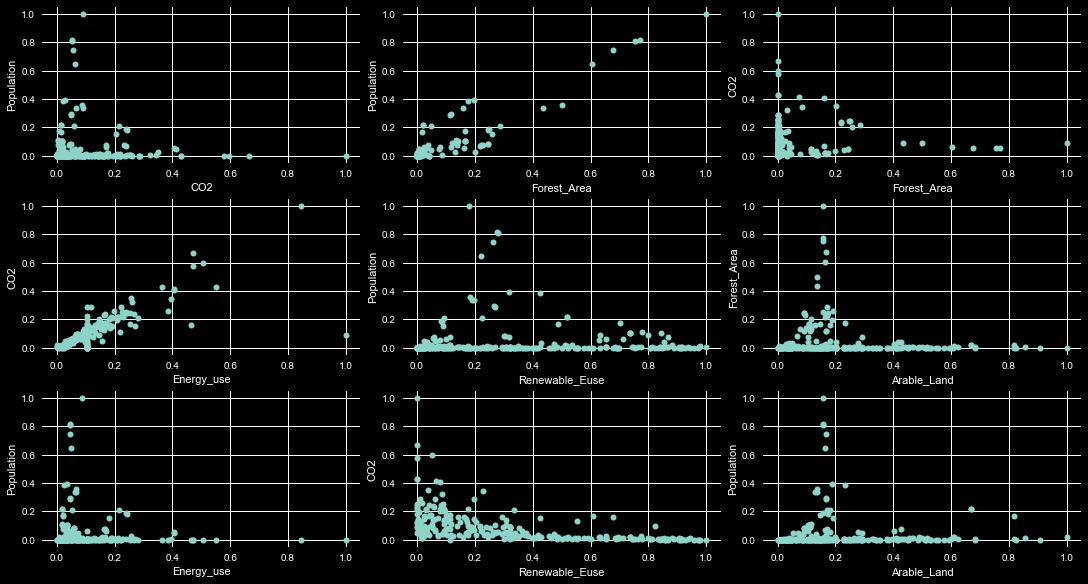

In [26]:
# Set up gridspec figure
fig = plt.figure(figsize=(15,8), constrained_layout=True)  # Setting the layout size to print it on the A4 Sheet

# Setting the Columns & Rows to the Grid Spec object
gs = fig.add_gridspec(nrows=3, ncols=3) 

ax1 = fig.add_subplot(gs[0,0])
#ax1.set_axis_off()

square_plot(stat_data_orig, "CO2", "Population")

ax2 = fig.add_subplot(gs[0,1])
square_plot(stat_data_orig, "Forest_Area", "Population")

ax3 = fig.add_subplot(gs[0,2])
square_plot(stat_data_orig, "Forest_Area", "CO2")


ax4 = fig.add_subplot(gs[1,0])
square_plot(stat_data_orig, "Energy_use", "CO2")


ax5 = fig.add_subplot(gs[1,1])
square_plot(stat_data_orig, "Renewable_Euse", "Population")

ax6 = fig.add_subplot(gs[1,2])
square_plot(stat_data_orig, "Arable_Land", "Forest_Area")

ax7 = fig.add_subplot(gs[2,0])
square_plot(stat_data_orig, "Energy_use", "Population")


ax8 = fig.add_subplot(gs[2,1])
square_plot(stat_data_orig, "Renewable_Euse", "CO2")

ax8 = fig.add_subplot(gs[2,2])
square_plot(stat_data_orig, "Arable_Land", "Population")



### 8. Clustering Using K-Means Algorithm and Displaying Cluster Membership

 From the above plots, we understand that 6 different plots are providing closer clusering. Using pre-defined custom function of K-means to find the clusters on the selected indicators. Here we are choosing cluster number as 4 for the clustering with reference to the above pre-processing step

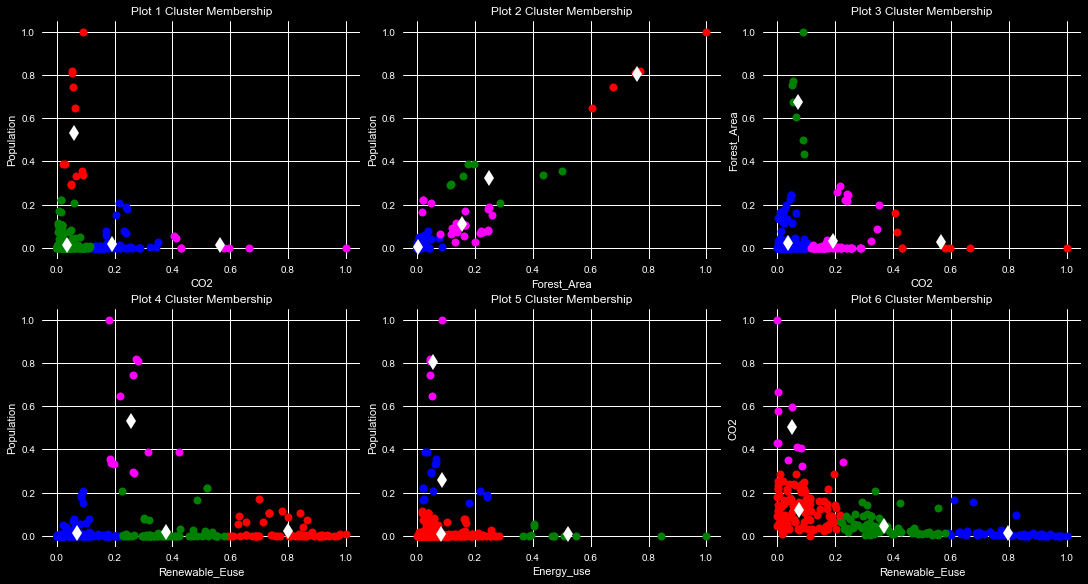

In [27]:
# Set up gridspec figure
fig = plt.figure(figsize=(15, 8), constrained_layout=True)  # Setting the layout size to print it on the A4 Sheet

# Setting the Columns & Rows to the Grid Spec object
gs = fig.add_gridspec(nrows=2, ncols=3) 

ax1 = fig.add_subplot(gs[0,0])
#ax1.set_axis_off()
K_mean (stat_data_orig,"CO2", "Population", 4, "Plot 1 Cluster Membership")

ax2 = fig.add_subplot(gs[0,1])
K_mean (stat_data_orig,"Forest_Area", "Population", 4, "Plot 2 Cluster Membership")

ax3 = fig.add_subplot(gs[0,2])
K_mean (stat_data_orig,"CO2", "Forest_Area", 4, "Plot 3 Cluster Membership")


ax4 = fig.add_subplot(gs[1,0])
K_mean (stat_data_orig,"Renewable_Euse", "Population", 4, "Plot 4 Cluster Membership")


ax5 = fig.add_subplot(gs[1,1])
K_mean (stat_data_orig,"Energy_use", "Population", 4, "Plot 5 Cluster Membership")


ax6 = fig.add_subplot(gs[1,2])
K_mean (stat_data_orig,"Renewable_Euse", "CO2", 4, "Plot 6 Cluster Membership")

### 9. Analysis & Findings on Clustering Data

Compare some results and showing our findings